<a href="https://colab.research.google.com/github/khamidjonov-ds-da/Smaller-DS-ML-projects/blob/main/Number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load data

In [ ]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

Data shape

In [ ]:
print("Image data shape", digits.data.shape)
print("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


Display some images

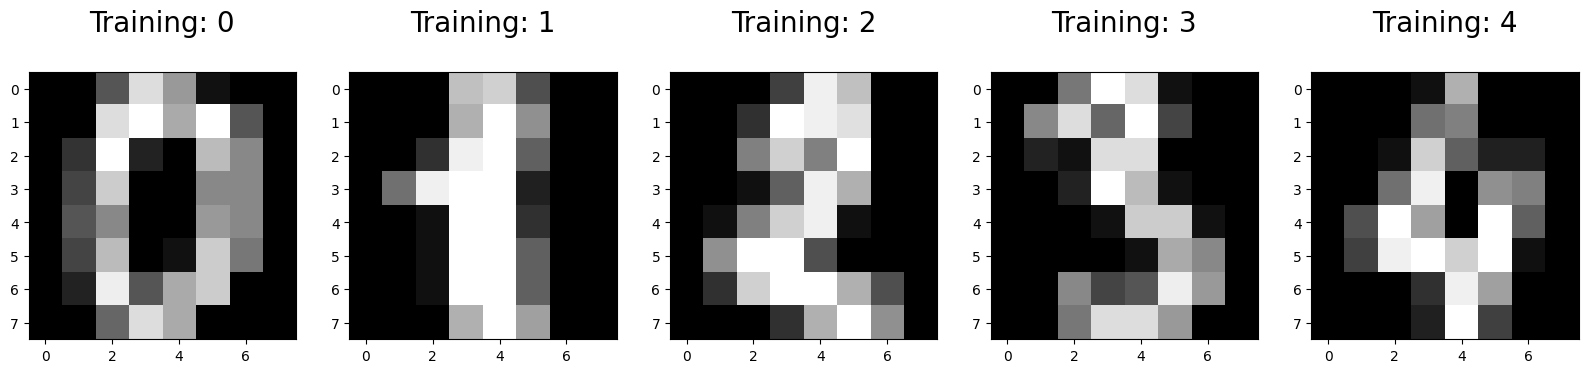

In [ ]:
plt.figure(figsize=(20, 4))
for idx, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, idx+1)
  plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize=20)

Split into train and test sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)


Train dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predict one observation

In [ ]:
# Returns an array

print(logReg.predict(x_test[0].reshape(1, -1)))

[4]


In [ ]:
predictions = logReg.predict(x_test)

Calculate accuracy score

In [ ]:
acc_score = logReg.score(x_test, y_test)

print(acc_score)

0.9516908212560387


Calculate and print confusion matrix

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)

print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Display predictions and actual values together

Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

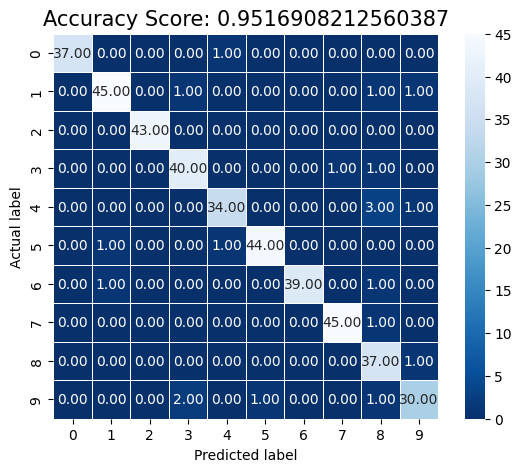

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidth=.5, square=True, cmap='Blues_r')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Accuracy Score: {0}'.format(acc_score),  size=15)

Display some images with actual values and predicted ones

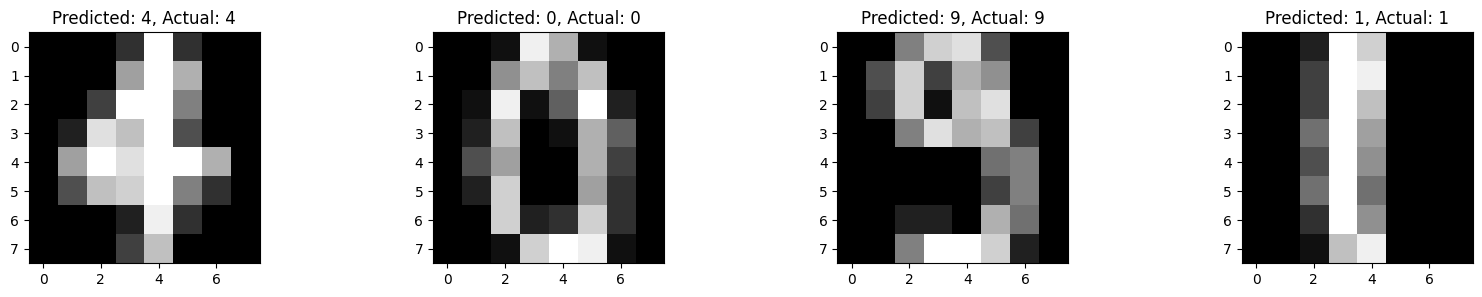

In [ ]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
  if predict == actual:
    misclassifiedIndex.append(index)
  index += 1

plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
  plt.subplot(1, 4, plotIndex + 1)
  plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap=plt.cm.gray)
  plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong], fontsize=20))